### Regularization Methods Example 4.1:
Here we use **GradientBoostingRegressor()** from **sklearn.ensemble**, to fit a boosted regression trees model to the Boston data set. The argument **n\_estimators=5000** indicates that we want $5000$ trees, the option **max\_depth=4** limits the depth of each tree, and **learning\_rate=0.001** shrinks the contribution of each tree.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

# Load data
df = pd.read_csv('./data/Boston.csv', index_col=0)

# Define target and predictors
x = df.drop(columns='medv') 
y = df['medv']

# Split in test and train set
np.random.seed(1)
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.5)

# Fit model:
reg = GradientBoostingRegressor(n_estimators=5000, max_depth=4, 
                                learning_rate=0.001)
reg = reg.fit(x_train, y_train)

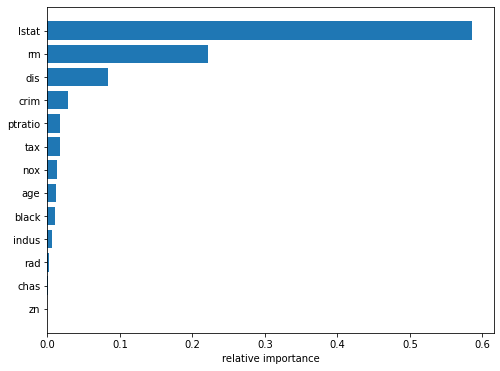

In [2]:
import matplotlib.pyplot as plt

# Feature Importances based on the impurity decrease
importance = reg.feature_importances_
features = x_train.columns.values

# Sort by importance
features = features[np.argsort(importance)]
importance = importance[np.argsort(importance)]

# plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
ax.barh(features, importance)
ax.set_xlabel("relative importance")
plt.show()

We see that **lstat** and **rm** are by far the most important variables. 

We now use the boosted model to predict **medv** on the test set:

In [4]:
from sklearn.metrics import mean_squared_error

# Predict
pred = reg.predict(x_test)

# MSE
MSE = mean_squared_error(y_test, pred)
print("MSE:", np.round(MSE, 3))

MSE: 10.675


The test MSE obtained is $10.361$; similar to the test MSE for random forests and superior to that for bagging. If we want to, we can perform boosting with a different value of the shrinkage parameter $\lambda$. The default value is $0.1$, but this is easily modified. Here we take $\lambda = 0.2$.

In [5]:
# Fit model with higher learning rate:
reg = GradientBoostingRegressor(n_estimators=5000, max_depth=4, learning_rate=0.2)
reg = reg.fit(x_train, y_train)

# Predict
pred = reg.predict(x_test)

# MSE
MSE = mean_squared_error(y_test, pred)
print("MSE:", np.round(MSE, 3))

MSE: 10.228


In this case, using $\lambda = 0.2$ leads to a slightly lower test MSE than $\lambda = 0.001$.